Part 1 ‑ Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular \
geographic location. Aggregate these login counts based on 15minute \
time intervals, and visualize and describe the resulting time series of \
login counts in ways that best characterize the underlying patterns of the demand.\
Please report/illustrate important features of the demand, such as daily cycles. If \
there are data quality issues, please report them.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.5)

In [2]:
data = pd.read_json('logins.json')

In [3]:
data.set_index('login_time', inplace=True)

In [4]:
data['no_logins'] = 1

In [5]:
data = data.resample("1H").count().copy()

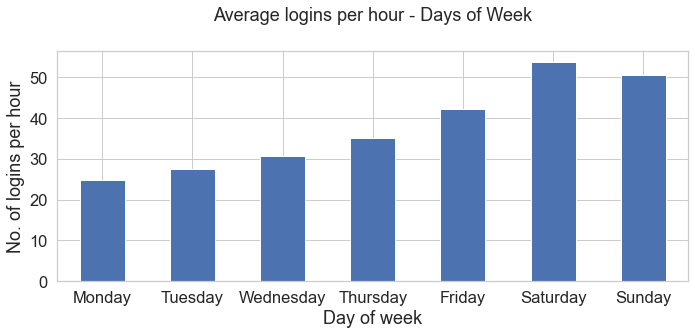

In [6]:
ax = data.groupby(data.index.weekday).mean().plot.bar(figsize=(10,5),rot=0)
ax.set_ylabel('No. of logins per hour')
ax.set_xlabel('Day of week')
ax.set_xticklabels(['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
ax.set_title('Average logins per hour - Days of Week', pad=30)
ax.get_legend().remove()
plt.tight_layout()

#### Comments
<br>
Average logins per hour increase as it gets later into the week, peaking on Saturday.

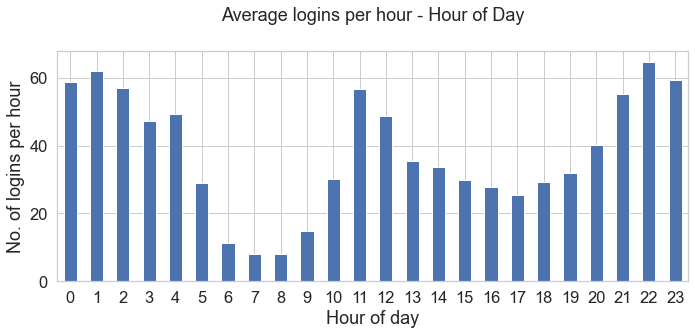

In [7]:
ax = data.groupby(data.index.hour).mean().plot.bar(figsize=(10,5),rot=0)
ax.set_title('Average logins per hour - Hour of Day', pad=30)
ax.set_ylabel('No. of logins per hour')
ax.set_xlabel('Hour of day')
ax.get_legend().remove()
plt.tight_layout()

#### Comments
<br>
The day starts off very busy. These is a lull in activity from hour 5-10. After this, activity rises until a peak at 11 and then slowly decreases until hour 17, where it picks back up again until another peak at hour 22.

In [8]:
hour_x_day = data.groupby([data.index.hour,data.index.weekday]).mean().unstack()
hour_x_day.columns = hour_x_day.columns.droplevel()

hour_x_day.columns.rename('day_of_week', inplace=True)
hour_x_day.index.rename('hour', inplace=True)

hour_x_day = hour_x_day.reset_index().melt(id_vars='hour')

hour_x_day.day_of_week = hour_x_day.day_of_week.map({0:'Monday', 1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})

In [9]:
mean = data.groupby(data.index.hour).mean().describe().loc['mean'][0]
std = data.groupby(data.index.hour).mean().describe().loc['std'][0]

In [10]:
avg_line = pd.DataFrame(columns=['hour', 'value'])

for x in range(0,24):
    avg_line = avg_line.append({'hour':x, 'value':mean}, ignore_index=True)
    
std_above_line = avg_line.copy()
std_above_line.value = std_above_line.value + std

std_below_line = avg_line.copy()
std_below_line.value = std_below_line.value - std

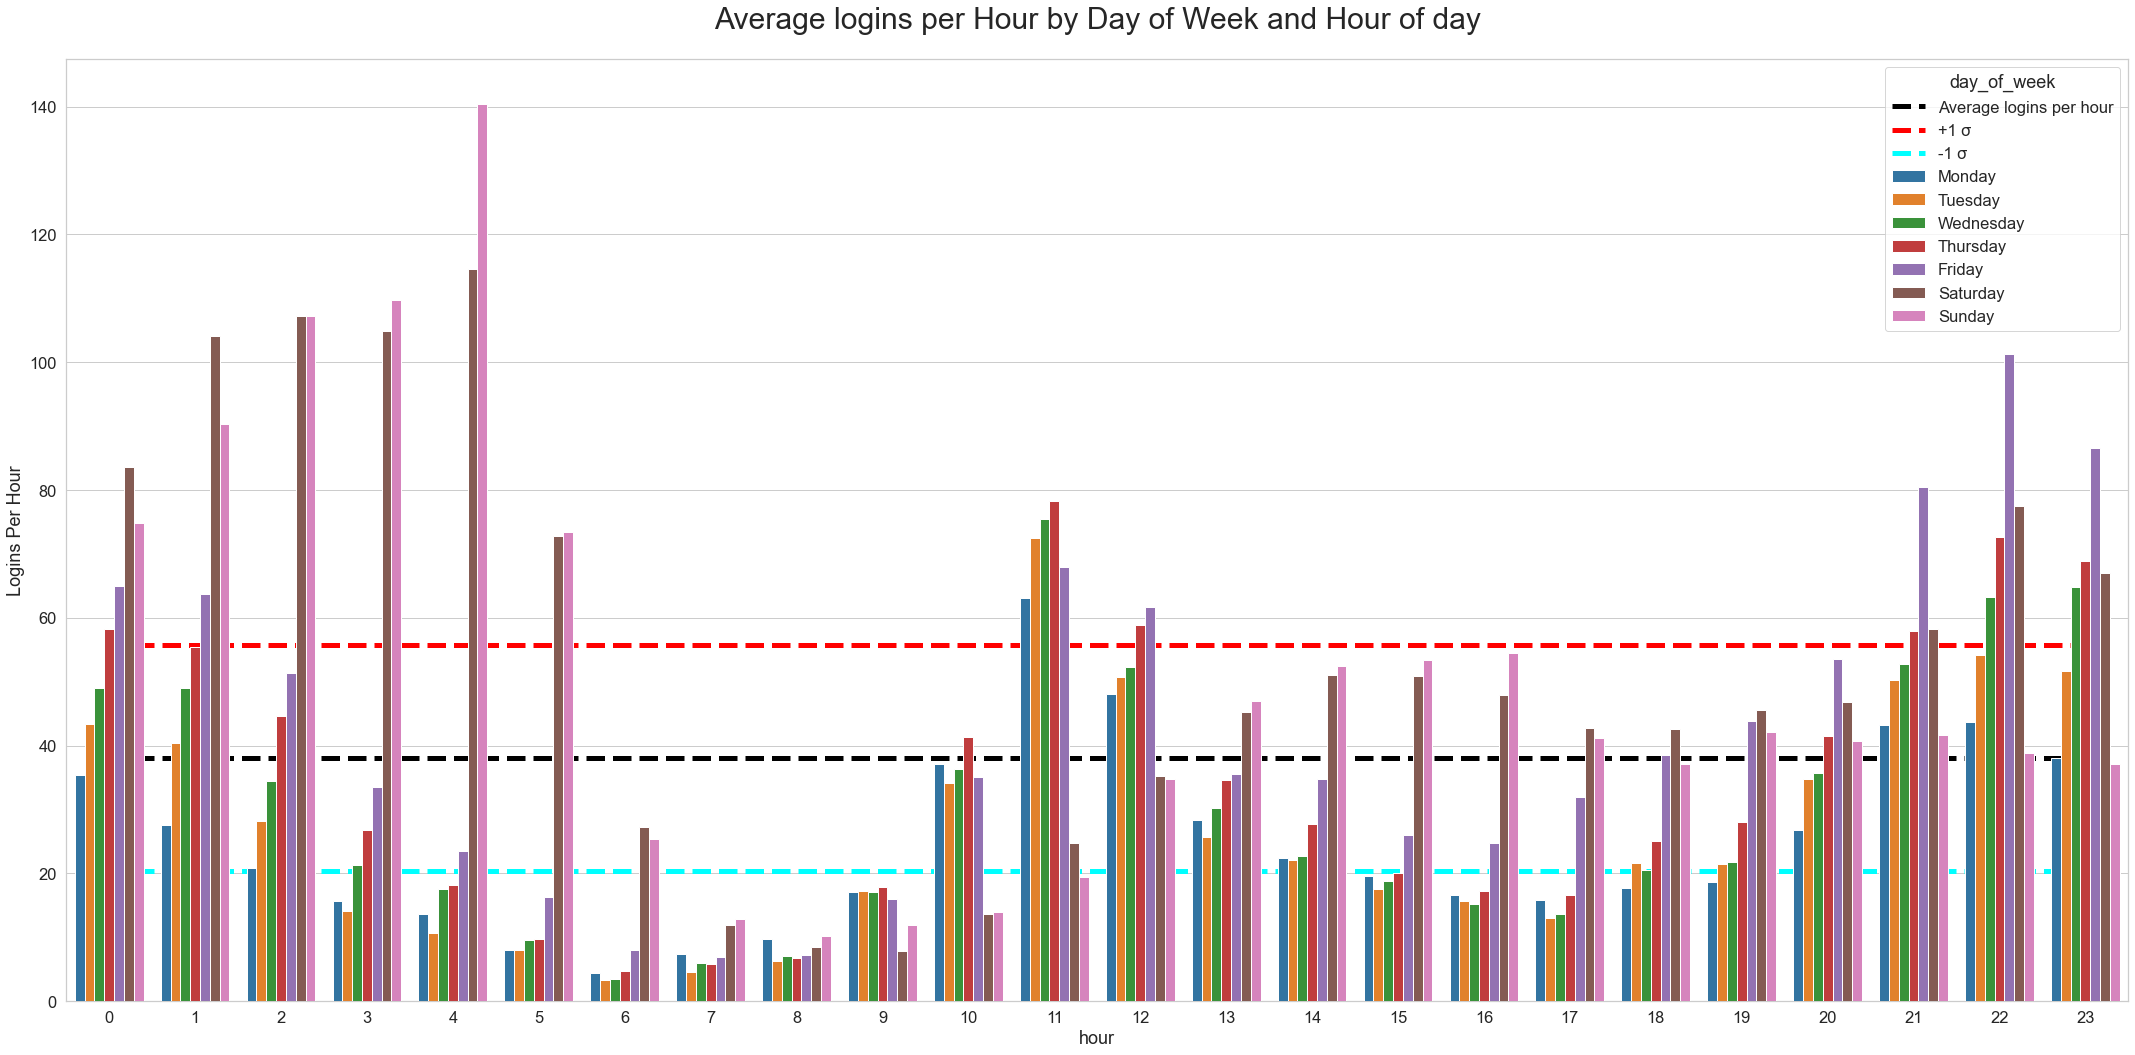

In [11]:
plt.figure(figsize=(30, 15))
sns.lineplot(data = avg_line, x='hour', y='value',lw=5,linestyle='--',color='black',zorder=2,label='Average logins per hour')
sns.lineplot(data = std_above_line, x='hour', y='value',lw=5,linestyle='--',color='red',zorder=2,label='+1 σ')
sns.lineplot(data = std_below_line, x='hour', y='value',lw=5,linestyle='--',color='cyan',zorder=2,label='-1 σ')

ax = sns.barplot(data = hour_x_day, x='hour',y='value', hue='day_of_week',palette='tab10', zorder=3)
ax.set_title('Average logins per Hour by Day of Week and Hour of day',fontsize=30,pad=30)
ax.set_ylabel('Logins Per Hour')
plt.tight_layout()

### Comments
<br>
The black dashed line represents the average logins per hour across every hour. The red dashed line represents +1 standard deviation above the mean. The cyan line represents 1 standard deviation below the mean.